![title](imagens/M03-NocoesEstatistica.jpg)

## Noções de Matemática - Estatística e Probabilidade - Parte 10

## 10. Análise de Variância (ANOVA)

**10.1 Conceitos Básicos de ANOVA**

A Análise de Variância (ANOVA) é uma técnica estatística utilizada para comparar as médias de três ou mais grupos para determinar se há diferenças estatisticamente significativas entre eles. A ANOVA é uma extensão do teste t de Student para mais de dois grupos. Alguns conceitos básicos de ANOVA são:

•	**Variabilidade**: A ANOVA analisa a variabilidade entre os grupos (variância entre os grupos) e a variabilidade dentro dos grupos (variância dentro dos grupos).

•	**Hipóteses**: As hipóteses nula (H0) e alternativa (Ha) na ANOVA são formuladas com base na igualdade ou diferença das médias dos grupos.

•	**Estatística de Teste**: A ANOVA utiliza uma estatística de teste chamada Estatística F, que compara a variabilidade entre os grupos com a variabilidade dentro dos grupos.

•	**Valor-P**: O valor-p é calculado a partir da Estatística F e é utilizado para tomar uma decisão sobre a hipótese nula. Um valor-p baixo (geralmente, abaixo de 0,05) indica rejeição da hipótese nula.

Para exemplificar a análise de variância (ANOVA), a seguir será criado um cenário fictício de análise de desempenho de diferentes versões de um site de comércio eletrônico. 

Vamos supor que o objetivo é determinar se existe uma diferença significativa nas taxas de conversão entre as três versões do site (A, B e C). Será criado a seguir um script que descreve o cenário, realiza a análise de variância (ANOVA) e ilustra graficamente os resultados.

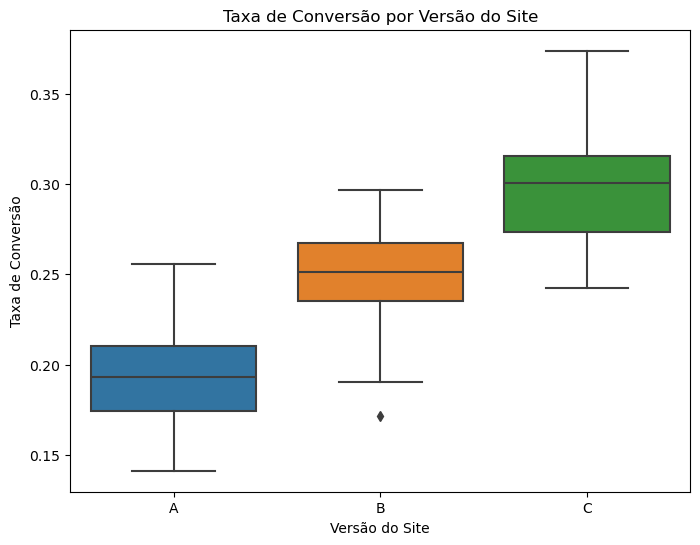

Resultados da ANOVA:
Estatística F: 174.57728683285964
Valor p: 1.4790221141083277e-39
Rejeitar a hipótese nula: Existe diferença significativa entre as versões.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Criando um DataFrame fictício com os dados
np.random.seed(42)
data = {
    'Versao': np.repeat(['A', 'B', 'C'], 50),
    'Taxa_Conversao': np.concatenate([np.random.normal(0.2, 0.03, 50),
                                      np.random.normal(0.25, 0.03, 50),
                                      np.random.normal(0.3, 0.03, 50)])
}
df = pd.DataFrame(data)

# Visualização dos dados
plt.figure(figsize=(8, 6))
sns.boxplot(x='Versao', y='Taxa_Conversao', data=df)
plt.title('Taxa de Conversão por Versão do Site')
plt.xlabel('Versão do Site')
plt.ylabel('Taxa de Conversão')
plt.show()

# Realizando a análise de variância (ANOVA)
anova_results = f_oneway(df[df['Versao'] == 'A']['Taxa_Conversao'],
                         df[df['Versao'] == 'B']['Taxa_Conversao'],
                         df[df['Versao'] == 'C']['Taxa_Conversao'])

# Imprimindo os resultados da ANOVA
print("Resultados da ANOVA:")
print("Estatística F:", anova_results.statistic)
print("Valor p:", anova_results.pvalue)

# Conclusão com base no valor p
alpha = 0.05
if anova_results.pvalue < alpha:
    print("Rejeitar a hipótese nula: Existe diferença significativa entre as versões.")
else:
    print("Não rejeitar a hip. nula: Não há evidência de dif. significativa entre as versões.")

# Fim